<a href="https://colab.research.google.com/github/SouravGolder/Quora-similarity-model/blob/main/Siamese_Network_for_Quora_Duplicate_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q tensorflow
!pip install -q scikit-learn
!pip install -q nltk
!pip install -q wordcloud

In [ ]:
# ============================================================
# INSTALL ALL REQUIRED PACKAGES FOR QUORA DUPLICATE DETECTION
# ============================================================

!pip install -q numpy pandas matplotlib seaborn scikit-learn
!pip install -q nltk wordcloud
!pip install -q tensorflow
!pip install -q transformers
!pip install -q sentencepiece
!pip install -q py7zr  # for kaggle archives if needed

# Download NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

print("All packages installed successfully.")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.0/97.0 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.7/51.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 429.9/429.9 kB 16.8 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


All packages installed successfully.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2025-11-21 07:51:37--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-11-21 07:51:37--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-11-21 07:51:37--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Loaded with fallback, shape: (404319, 6)
Vocab size: 20000
Loaded 400000 word vectors from GloVe.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 25)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 25)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 25, 100)   │  2,000,000 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d_2 │ (None, 25, 100)   │          0 │ embedding_1[0][0] │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d_3 │ (None, 25, 100)   │          0 │ embedding_1[1][0] │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_2 (GRU)         │ (None, 32)        │     12,864 │ spatial_dropout1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_3 (GRU)         │ (None, 32)        │     12,864 │ spatial_dropout1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_3 (Lambda)   │ (None, 32)        │          0 │ gru_2[0][0],      │
│                     │                   │            │ gru_3[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_4 (Lambda)   │ (None, 32)        │          0 │ gru_2[0][0],      │
│                     │                   │            │ gru_3[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_5 (Lambda)   │ (None, 1)         │          0 │ gru_2[0][0],      │
│                     │                   │            │ gru_3[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 129)       │          0 │ gru_2[0][0],      │
│ (Concatenate)       │                   │            │ gru_3[0][0],      │
│                     │                   │            │ lambda_3[0][0],   │
│                     │                   │            │ lambda_4[0][0],   │
│                     │                   │            │ lambda_5[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │      8,320 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │         65 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,034,113 (7.76 MB)

 Trainable params: 34,113 (133.25 KB)

 Non-trainable params: 2,000,000 (7.63 MB)

Class weights: {0: np.float64(0.7927308040080456), 1: np.float64(1.3540269646276406)}
Epoch 1/25
2685/2685 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6333 - auc: 0.6864 - loss: 0.6302
Epoch 1: val_loss improved from inf to 0.58584, saving model to siamese_fast_gru.h5


2685/2685 ━━━━━━━━━━━━━━━━━━━━ 137s 49ms/step - accuracy: 0.6333 - auc: 0.6864 - loss: 0.6302 - val_accuracy: 0.6822 - val_auc: 0.7733 - val_loss: 0.5858 - learning_rate: 0.0010
Epoch 2/25
2684/2685 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7021 - auc: 0.7707 - loss: 0.5693
Epoch 2: val_loss improved from 0.58584 to 0.56647, saving model to siamese_fast_gru.h5


2685/2685 ━━━━━━━━━━━━━━━━━━━━ 138s 48ms/step - accuracy: 0.7021 - auc: 0.7707 - loss: 0.5693 - val_accuracy: 0.6957 - val_auc: 0.7889 - val_loss: 0.5665 - learning_rate: 0.0010
Epoch 3/25
2685/2685 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7120 - auc: 0.7853 - loss: 0.5545
Epoch 3: val_loss improved from 0.56647 to 0.55676, saving model to siamese_fast_gru.h5


2685/2685 ━━━━━━━━━━━━━━━━━━━━ 130s 48ms/step - accuracy: 0.7120 - auc: 0.7853 - loss: 0.5545 - val_accuracy: 0.7040 - val_auc: 0.7986 - val_loss: 0.5568 - learning_rate: 0.0010
Epoch 4/25
2685/2685 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7170 - auc: 0.7944 - loss: 0.5449
Epoch 4: val_loss improved from 0.55676 to 0.54202, saving model to siamese_fast_gru.h5


2685/2685 ━━━━━━━━━━━━━━━━━━━━ 135s 50ms/step - accuracy: 0.7170 - auc: 0.7944 - loss: 0.5449 - val_accuracy: 0.7141 - val_auc: 0.8046 - val_loss: 0.5420 - learning_rate: 0.0010
Epoch 5/25
2685/2685 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7223 - auc: 0.8015 - loss: 0.5372
Epoch 5: val_loss improved from 0.54202 to 0.53756, saving model to siamese_fast_gru.h5


2685/2685 ━━━━━━━━━━━━━━━━━━━━ 128s 48ms/step - accuracy: 0.7223 - auc: 0.8015 - loss: 0.5372 - val_accuracy: 0.7145 - val_auc: 0.8076 - val_loss: 0.5376 - learning_rate: 0.0010
Epoch 6/25
2685/2685 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7249 - auc: 0.8071 - loss: 0.5311
Epoch 6: val_loss improved from 0.53756 to 0.52926, saving model to siamese_fast_gru.h5


2685/2685 ━━━━━━━━━━━━━━━━━━━━ 131s 49ms/step - accuracy: 0.7249 - auc: 0.8071 - loss: 0.5311 - val_accuracy: 0.7206 - val_auc: 0.8130 - val_loss: 0.5293 - learning_rate: 0.0010
Epoch 7/25
2684/2685 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7284 - auc: 0.8120 - loss: 0.5253
Epoch 7: val_loss did not improve from 0.52926
2685/2685 ━━━━━━━━━━━━━━━━━━━━ 141s 48ms/step - accuracy: 0.7284 - auc: 0.8120 - loss: 0.5253 - val_accuracy: 0.7212 - val_auc: 0.8170 - val_loss: 0.5303 - learning_rate: 0.0010
Epoch 8/25
2685/2685 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7314 - auc: 0.8157 - loss: 0.5208
Epoch 8: val_loss did not improve from 0.52926

Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
2685/2685 ━━━━━━━━━━━━━━━━━━━━ 147s 50ms/step - accuracy: 0.7314 - auc: 0.8157 - loss: 0.5208 - val_accuracy: 0.7126 - val_auc: 0.8183 - val_loss: 0.5345 - learning_rate: 0.0010
Epoch 9/25
2685/2685 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7343 - auc: 0.8221 -

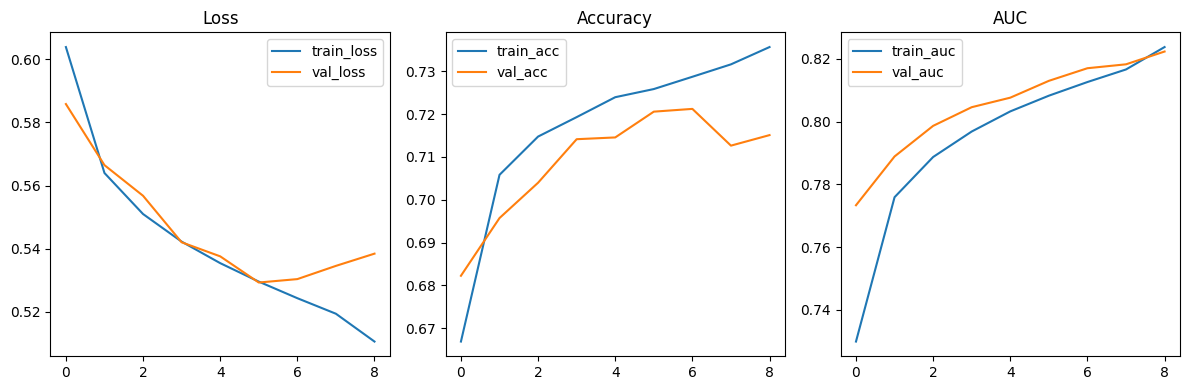

119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step
Accuracy: 0.7205513784461153
Precision: 0.595497738349872
Recall: 0.7583389149363697
F1: 0.6671249558078328
ROC AUC: 0.8130272855160802


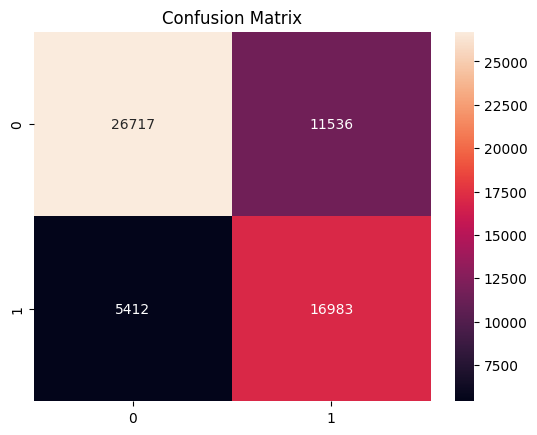

Saved model & tokenizer.


In [ ]:
# ============================================================
# Fast Siamese Network for Quora Duplicate Detection
# ============================================================

import os, random, re, pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, GRU, Dense, Dropout, SpatialDropout1D, GlobalMaxPooling1D, concatenate
from tensorflow.keras.models import Model

import nltk
nltk.download('punkt'); nltk.download('stopwords'); nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# ------------------------
# Config / Hyperparameters
# ------------------------
SEED = 42
random.seed(SEED); np.random.seed(SEED); tf.random.set_seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

DATA_PATH = "/content/train.csv"   # <-- update path if needed
MAX_NUM_WORDS = 20000
MAX_SEQ_LEN = 25
EMBEDDING_DIM = 100    # smaller for faster training
GRU_UNITS = 32
DENSE_UNITS = 64
BATCH_SIZE = 128
EPOCHS = 25

# ------------------------
# Load CSV safely
# ------------------------
encodings = ["utf-8", "utf-8-sig", "latin1", "ISO-8859-1", "cp1252"]
df = None
for enc in encodings:
    try:
        df = pd.read_csv(DATA_PATH, encoding=enc, engine='python')
        print(f"Loaded {DATA_PATH} with {enc}, shape {df.shape}")
        break
    except:
        continue
if df is None:
    df = pd.read_csv(DATA_PATH, engine='python', on_bad_lines='skip', encoding='latin1')
    print("Loaded with fallback, shape:", df.shape)

assert 'question1' in df.columns and 'question2' in df.columns, "Dataset must contain question1 & question2"
assert 'is_duplicate' in df.columns, "Dataset must contain is_duplicate"

# ------------------------
# Clean text
# ------------------------
STOPWORDS = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
REPLACE_BY_SPACE_RE = re.compile(r"[/(){}\[\]|@,;]")
BAD_SYMBOLS_RE = re.compile(r"[^0-9a-z #+_]")

def clean_text(text):
    if pd.isna(text): return ""
    text = str(text).lower()
    text = REPLACE_BY_SPACE_RE.sub(" ", text)
    text = BAD_SYMBOLS_RE.sub("", text)
    return " ".join([lemmatizer.lemmatize(w) for w in text.split() if w not in STOPWORDS])

df['q1'] = df['question1'].astype(str).apply(clean_text)
df['q2'] = df['question2'].astype(str).apply(clean_text)

# ------------------------
# Tokenizer & sequences
# ------------------------
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token=None)
tokenizer.fit_on_texts(list(df['q1']) + list(df['q2']))
vocab_size = min(MAX_NUM_WORDS, len(tokenizer.word_index) + 1)
print("Vocab size:", vocab_size)

q1_seq = tokenizer.texts_to_sequences(df['q1'])
q2_seq = tokenizer.texts_to_sequences(df['q2'])
q1_pad = pad_sequences(q1_seq, maxlen=MAX_SEQ_LEN, padding='post', truncating='post')
q2_pad = pad_sequences(q2_seq, maxlen=MAX_SEQ_LEN, padding='post', truncating='post')

y = df['is_duplicate'].values
X_train_q1, X_val_q1, X_train_q2, X_val_q2, y_train, y_val = train_test_split(
    q1_pad, q2_pad, y, test_size=0.15, random_state=SEED, stratify=y
)

# ------------------------
# Load 100d GloVe embeddings
# ------------------------
GLOVE_FILE = "glove.6B.100d.txt"  # download and put in Colab working directory
embedding_index = {}
with open(GLOVE_FILE, 'r', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = vector
print(f"Loaded {len(embedding_index)} word vectors from GloVe.")

embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM), dtype=np.float32)
for word, i in tokenizer.word_index.items():
    if i >= vocab_size: continue
    vec = embedding_index.get(word)
    if vec is not None:
        embedding_matrix[i] = vec

# ------------------------
# Fast Siamese model (GRU + frozen embeddings)
# ------------------------
from tensorflow.keras.layers import Lambda
from tensorflow.keras import backend as K


def fast_siamese(vocab_size, embedding_matrix):
    input_1 = Input(shape=(MAX_SEQ_LEN,))
    input_2 = Input(shape=(MAX_SEQ_LEN,))

    embedding_layer = Embedding(
        vocab_size, EMBEDDING_DIM, weights=[embedding_matrix],
        trainable=False
    )

    def encode(x):
        x = embedding_layer(x)
        x = SpatialDropout1D(0.15)(x)
        x = GRU(GRU_UNITS)(x)
        return x

    x1 = encode(input_1)
    x2 = encode(input_2)

    # Use Lambda layers for operations
    l1 = Lambda(lambda tensors: tf.math.abs(tensors[0] - tensors[1]), output_shape=(GRU_UNITS,))([x1, x2])
    l2 = Lambda(lambda tensors: tensors[0] * tensors[1], output_shape=(GRU_UNITS,))([x1, x2])

    cos_sim = Lambda(lambda tensors:
                     K.sum(tensors[0] * tensors[1], axis=1, keepdims=True) /
                     (K.sqrt(K.sum(K.square(tensors[0]), axis=1, keepdims=True)) *
                      K.sqrt(K.sum(K.square(tensors[1]), axis=1, keepdims=True))),
                     output_shape=(1,))([x1, x2])

    merged = concatenate([x1, x2, l1, l2, cos_sim])

  # merged = concatenate([x1, x2, l1, l2])

    merged = Dense(DENSE_UNITS, activation='relu')(merged)
    merged = Dropout(0.2)(merged)
    out = Dense(1, activation='sigmoid')(merged)

    model = Model([input_1, input_2], out)
    model.compile('adam', 'binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
    return model


model = fast_siamese(vocab_size, embedding_matrix)
model.summary()

# ------------------------
# Class weights for imbalance
# ------------------------
classes = np.unique(y_train)
cw = compute_class_weight("balanced", classes=classes, y=y_train)
class_weights = {int(c): w for c, w in zip(classes, cw)}
print("Class weights:", class_weights)


# ------------------------
# Model CheckPoint
# ------------------------
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    "siamese_fast_gru.h5",
    monitor="val_loss",
    mode="min",
    save_best_only=True,
    verbose=1
  )


# ------------------------
# EarlyStopping Callback
# ------------------------
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min',
    restore_best_weights=True,
    verbose=1
  )


# ------------------------
# ReduceLROnPlateau
# ------------------------
from tensorflow.keras.callbacks import ReduceLROnPlateau

reducelronplateau = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-6,
    verbose=1
    )



# ------------------------
# Train
# ------------------------
history = model.fit(
    [X_train_q1, X_train_q2], y_train,
    validation_data=([X_val_q1, X_val_q2], y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    class_weight=class_weights,
    callbacks=[checkpoint, early_stop, reducelronplateau],
    verbose=1
)

# ------------------------
# Plot metrics
# ------------------------
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(); plt.title('Loss')
plt.subplot(1,3,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend(); plt.title('Accuracy')
plt.subplot(1,3,3)
plt.plot(history.history['auc'], label='train_auc')
plt.plot(history.history['val_auc'], label='val_auc')
plt.legend(); plt.title('AUC')
plt.tight_layout()
plt.show()

# ------------------------
# Evaluate
# ------------------------
y_val_pred_proba = model.predict([X_val_q1, X_val_q2], batch_size=512).ravel()
y_val_pred = (y_val_pred_proba > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Precision:", precision_score(y_val, y_val_pred))
print("Recall:", recall_score(y_val, y_val_pred))
print("F1:", f1_score(y_val, y_val_pred))
print("ROC AUC:", roc_auc_score(y_val, y_val_pred_proba))

sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()

# ------------------------
# Save model & tokenizer
# ------------------------
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)
model.save("siamese_fast_gru.h5")
print("Saved model & tokenizer.")
